
**Détectez des émotions dans des photos de visages(colère, joie, tristesse)**

###  Installation des librairies

In [1]:
import fastai, fastbook

fastai.__version__, fastbook.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


('2.7.18', '0.0.29')

### Importation des librairies

In [2]:
#monter drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Code pour importer les modules de vision et fastbook
from fastai.vision.all import *
from fastbook import *

In [4]:
from sklearn.model_selection import train_test_split

## **I. Collecte d'urls des données**



## collecter 250 url d’images pour chacune des catégories ou classes de votre problème.





In [5]:
# telechatger les urls
n_images = 250
colere = search_images_ddg('photo of angry person', max_images=n_images)
joie = search_images_ddg('photo of happy person', max_images=n_images)
tristesse = search_images_ddg('photo of sad person', max_images=n_images)

colere[0],joie[0],tristesse[0]

('https://thumbs.dreamstime.com/b/angry-young-man-motion-effect-5922196.jpg',
 'https://wallpapercave.com/wp/wp3720008.jpg',
 'http://www.publicdomainpictures.net/pictures/20000/velka/sad-child-portrait.jpg')

## 2. Diviser la liste d’urls de chaque catégorie en **2 listes disjointes**:
 une liste de 200 urls et une autre de 50 urls.

</br>

In [6]:
#  une liste de 200 urls et une autre de 50 urls. Utiliser le préfixe 'extra' pour ces listes de 50 urls.
urls_colere, extra_urls_colere = train_test_split(colere, test_size=50, shuffle=False)
urls_joie, extra_urls_joie = train_test_split(joie, test_size=50, shuffle=False)
urls_tristesse, extra_urls_tristesse = train_test_split(tristesse, test_size=50, shuffle=False)


extra_urls_tristesse[49], extra_urls_joie[0], extra_urls_colere[0]

('https://img.freepik.com/premium-photo/sad-person-illustration_1003030-16866.jpg',
 'https://clipart-library.com/2023/happy-business-man-clipart-xl.png',
 'http://qbq.com/wp-content/uploads/2015/10/Angry-boy.jpg')

In [7]:
#tester les liens

assert(len(set(urls_colere) & set(extra_urls_colere)) == 0)
assert(len(set(urls_joie) & set(extra_urls_joie)) == 0)
assert(len(set(urls_tristesse) & set(extra_urls_tristesse)) == 0)


# II. **Téléchargement et  Visualisation des données**

## defintion des fonctions 
`download_images` et `delete_corrupted_images` servant à télécharger les images en respectant leur organisation par dossier et supprimer les images corrompus

In [8]:
def download_images(root, classes, urls_classes):
    """
    Télécharge les images depuis les URLs et les place dans les sous-dossiers
    de `root` correspondant aux classes.

    Args:
        root (Path): dossier racine des données
        classes (List): liste des classes
        urls_classes (List[List]): Liste des URLs des images par classe suivant
                                   le même ordre que `classes`
    """
    # Créer les dossiers pour chaque classe
    paths = [Path(root) / c for c in classes]
    for path in paths:
        path.mkdir(parents=True, exist_ok=True)

    # Télécharger les images pour chaque classe
    for class_name, urls, path in zip(classes, urls_classes, paths):
        print(f"Téléchargement des images pour la classe: {class_name}")
        for i, url in enumerate(urls):
            try:
                download_url(url, path / f"image_{i}.jpg")
            except Exception as e:
                print(f"Erreur pour {url}: {e}")


def delete_corrupted_images(root):
    """
    Supprime les fichiers corrompus de `root`.

    Args:
        root (Path): dossier racine des données
    """
    root = Path(root)
    for img_path in root.rglob("*.*"):  # Parcourt tous les fichiers dans le dossier
        try:
            # Essayer d'ouvrir l'image pour vérifier sa validité
            with Image.open(img_path) as img:
                img.verify()
        except (IOError, SyntaxError) as e:
            print(f"Image corrompue supprimée: {img_path}")
            img_path.unlink()  # Supprime le fichier corrompu

## 2. Utilisation des deux fonctions pour télécharger les images du dossier `train/` et supprimer celles corrompues

In [9]:
# Renseigner le chemin vers le dossier racine où seront stockés
# vos données
folder = "/content/drive/MyDrive/deep_learning"
root = Path(folder+'/data/train')
classes =['colere', 'joie','tristesse']


Téléchargement des images pour la classe: colere


Erreur pour https://www.colorado.edu/asmagazine/sites/default/files/styles/hero/public/article-image/angry_faces.jpg?itok=WiPPSDVN: HTTP Error 404: Not Found
====Error Body====
<!DOCTYPE html>
<html lang="en" dir="ltr" prefix="og: https://ogp.me/ns#">
  <head>
    <meta charset="utf-8" />
<noscript><style>form.antibot * :not(.antibot-message) { display: none !important; }</style>
</noscript><link rel="canonical" href="https://www.colorado.edu/asmagazine/404" />
<meta property="og:site_name" content="Colorado Arts and Sciences Magazine" />
<meta property="og:title" content="Page Not Found" />
<meta property="og:description" content="The page you are looking for appears to have been moved, deleted, or does not exist." />
<meta name="Generator" content="Drupal 10 (https://www.drupal.org)" />
<meta name="MobileOptimized" content="width" />
<meta name="HandheldFriendly" content="true" />
<meta name="viewport" content="width=device-width, initial-scale=1.0" />
<link rel="icon" href="/asmagaz

Erreur pour https://static.vecteezy.com/system/resources/previews/011/167/922/non_2x/angry-man-screaming-with-brain-explosion-stressed-work-mad-upset-frustrated-concept-illustration-free-vector.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Attention Required! | Cloudflare</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" />
<!--[if lt IE 9]><link rel="styl

Erreur pour http://weknowyourdreams.com/images/angry/angry-05.jpg: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)>


Erreur pour https://images.medicaldaily.com/sites/medicaldaily.com/files/2014/05/21/anger.jpg: <urlopen error [Errno -2] Name or service not known>


Erreur pour https://i1.wp.com/winkgo.com/wp-content/uploads/2020/11/angry-memes-02.jpg?resize=720%2C887&ssl=1: HTTP Error 404: Not Found
====Error Body====
<html>
<head><title>404 Not Found</title></head>
<body>
<center><h1>404 Not Found</h1></center>
<hr><center>nginx</center>
</body>
</html>
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->



Erreur pour https://www.crushpixel.com/big-static15/preview4/angry-man-shouting-2183593.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><style>*{box-sizing:border-box;margin:0;padding:0}html{line-height:1.15;-webkit-text-size-adjust:100%;color:#313131;font-family:system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji}body{display:flex;flex-direction:column;height:100vh;min-height:100vh}.main-content{margin:8rem auto;max-width:60rem;padding-left:1.5rem}@media (width <= 720px){.main-content{margin-top:4rem}}.h2{font-size:1.5rem;font-weight:500;line-height:2.25rem}@media (width

Erreur pour https://static.vecteezy.com/system/resources/previews/012/912/782/original/group-of-angry-people-quarrel-and-argue-free-vector.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Attention Required! | Cloudflare</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" />
<!--[if lt IE 9]><link rel="stylesheet" id='cf_styles-ie-css' href="/cdn-cgi/styles/cf.

Erreur pour http://christthetruth.files.wordpress.com/2010/06/anger.jpg: HTTP Error 403: Forbidden
====Error Body====

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml"><head profile="http://gmpg.org/xfn/11">
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<title>WordPress.com</title>
<style type="text/css">
img {
	border: 0;
}
a {
	color: #0074a2;
}
body {
	background: #f1f1f1;
	color: #444;
	font-family: "Open Sans",sans-serif;
	font-size: 13px;
	line-height: 21px;
	margin: 10% auto;
	text-align: center;
	width: 430px;
}
p {
	margin: 0;
}
.message {
	font-size: 17px;
	line-height: 25px
}
.message-box {
	background: #fff;
	border-left: 4px solid #ffba00;
	-webkit-box-shadow: 0 1px 1px 0 rgba(0,0,0,.1);
	-moz-box-shadow:    0 1px 1px 0 rgba(0,0,0,.1);
	box-shadow:         0 1px 1px 0 rgba(0,0,0,.1);
	margin: 33px 23px;
	padding: 33px 13px;
}
.signup-l

Erreur pour https://i0.wp.com/www.uslivinglife.com/wp-content/uploads/2018/02/0EB23E47-39C7-48CD-89ED-D1C034D738B5.jpeg?fit=4032%2C3024&ssl=1: HTTP Error 404: Not Found
====Error Body====
<html>
<head><title>404 Not Found</title></head>
<body>
<center><h1>404 Not Found</h1></center>
<hr><center>nginx</center>
</body>
</html>
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->



Erreur pour https://static.vecteezy.com/system/resources/previews/014/429/079/original/girl-angry-face-cartoon-cute-png.png: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Attention Required! | Cloudflare</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" />
<!--[if lt IE 9]><link rel="stylesheet" id='cf_styles-ie-css' href="/cdn-cgi/styles/cf.errors.ie.css" /><!

Erreur pour http://weknowyourdreams.com/images/angry/angry-03.jpg: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)>


Erreur pour https://i.redd.it/uvgoc1rgsxi11.png: HTTP Error 403: Blocked
====Error Body====
<body class=theme-beta><div><style>.theme-light,:root{--rem360:22.5rem;--rem320:20rem;--rem192:12rem;--rem144:9rem;--rem128:8rem;--rem96:6rem;--rem90:5.625rem;--rem88:5.5rem;--rem64:4rem;--rem56:3.5rem;--rem48:3rem;--rem40:2.5rem;--rem36:2.25rem;--rem32:2rem;--rem28:1.75rem;--rem26:1.625rem;--rem24:1.5rem;--rem22:1.375rem;--rem20:1.25rem;--rem18:1.125rem;--rem16:1rem;--rem15:0.9375rem;--rem14:0.875rem;--rem12:0.75rem;--rem10:0.625rem;--rem8:0.5rem;--rem6:0.375rem;--rem4:0.25rem;--rem2:0.125rem;--rem1:0.0625rem;--spacer-4xs:0.125rem;--spacer-2xs:0.25rem;--spacer-xs:0.5rem;--spacer-sm:0.75rem;--spacer-md:1rem;--spacer-lg:1.5rem;--spacer-xl:2rem;--spacer-2xl:3rem;--spacer-a-px:0px;--spacer-button-lg-px:var(--spacer-lg);--spacer-button-md-px:var(--spacer-lg);--spacer-button-sm-px:var(--spacer-md);--spacer-input-padding-left:0px;--spacer-input-padding-top:0px;--spacer-label-default:0px;--spacer-switc
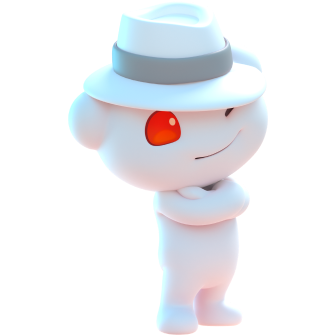

Téléchargement des images pour la classe: joie


Erreur pour http://informationng.com/wp-content/uploads/2014/03/bigstock_Happy_Business_People_With_Han_4049346.jpg: HTTP Error 404: Not Found
====Error Body====
<!doctype html >
<!--[if IE 8]><html class="ie8" lang="en"> <![endif]-->
<!--[if IE 9]><html class="ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--><html lang="en-US"> <!--<![endif]--><head><title>Page not found - Information Nigeria</title><meta charset="UTF-8" /><link rel="preconnect" href="https://fonts.gstatic.com/" crossorigin /><script type="256d5085fa2c04d117f65334-text/javascript">WebFontConfig={google:{families:["Oswald:400,100,200,300,500,600,700,800,900","Open Sans:400,600,700,100,200,300,500,800,900","Roboto:400,600,700,100,200,300,500,800,900"]}};if ( typeof WebFont === "object" && typeof WebFont.load === "function" ) { WebFont.load( WebFontConfig ); }</script><script data-optimized="1" src="https://www.informationng.com/wp-content/plugins/litespeed-cache/assets/js/webfontloader.min.js" type="256d5085fa2c04d117

Erreur pour http://www.coachrichbernstein.com/wp-content/uploads/2012/02/Shiny-Happy-People-654x449.jpg: HTTP Error 404: Not Found
====Error Body====
<!DOCTYPE html>
<html lang="en-US">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1">
	<link rel="profile" href="https://gmpg.org/xfn/11"> 
	<title>Page not found &#8211; Coach Rich Bernstein</title>
<meta name='robots' content='max-image-preview:large' />
	<style>img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }</style>
	<link rel="alternate" type="application/rss+xml" title="Coach Rich Bernstein &raquo; Feed" href="https://coachrichbernstein.com/feed/" />
<link rel="alternate" type="application/rss+xml" title="Coach Rich Bernstein &raquo; Comments Feed" href="https://coachrichbernstein.com/comments/feed/" />
<script>
window._wpemojiSettings = {"baseUrl":"https:\/\/s.w.org\/images\/core\/emoji\/15.0.3\/72x72\/","ext":".png","svgUrl":"https:\/\/s.w.org\/

Erreur pour http://thenectargroup.com/wp-content/uploads/2013/12/bigstock-Happy-Group-Of-People-3928383.jpg: HTTP Error 404: Not Found
====Error Body====
<!DOCTYPE html>
<html lang="en-US">
<head>
	<meta charset="UTF-8">
	<meta name="viewport" content="width=device-width, initial-scale=1.0, viewport-fit=cover" />		<meta name='robots' content='noindex, follow' />
	<style>img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }</style>
	
	<!-- This site is optimized with the Yoast SEO plugin v23.9 - https://yoast.com/wordpress/plugins/seo/ -->
	<title>Page not found &#187; The Nectar Group</title>
	<meta property="og:locale" content="en_US" />
	<meta property="og:title" content="Page not found &#187; The Nectar Group" />
	<meta property="og:site_name" content="The Nectar Group" />
	<script type="application/ld+json" class="yoast-schema-graph">{"@context":"https://schema.org","@graph":[{"@type":"WebSite","@id":"https://thenectargroup.com/#website","url":"http

Erreur pour http://lgba.co.uk/wp-content/blogs.dir/6/files/2014/03/happy_people-lrg.jpg: HTTP Error 404: Not Found
====Error Body====
<html>
<head><title>404 Not Found</title></head>
<body bgcolor="white">
<center><h1>404 Not Found</h1></center>
<hr><center>nginx</center>
</body>
</html>
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->



Erreur pour https://www.crushpixel.com/big-static11/preview4/happy-smiling-man-giving-thumbs-676406.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><style>*{box-sizing:border-box;margin:0;padding:0}html{line-height:1.15;-webkit-text-size-adjust:100%;color:#313131;font-family:system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji}body{display:flex;flex-direction:column;height:100vh;min-height:100vh}.main-content{margin:8rem auto;max-width:60rem;padding-left:1.5rem}@media (width <= 720px){.main-content{margin-top:4rem}}.h2{font-size:1.5rem;font-weight:500;line-height:2.25rem}@

Erreur pour http://www.freelargeimages.com/wp-content/uploads/2014/12/Happy_person-2.jpg: Remote end closed connection without response


Erreur pour http://blogs.psychcentral.com/character-strengths/files/2012/12/happy-people.jpg: HTTP Error 404: Not Found
====Error Body====
<!DOCTYPE html><html lang="en"><head>
<link rel=preload href="https://assets.psychcentral.com/_next/vendor-42c95.js" as=script crossorigin=anonymous><link rel=preload href="https://assets.psychcentral.com/_next/lib-b03c1.js" as=script crossorigin=anonymous><link rel=preload href="https://assets.psychcentral.com/_next/felib-core-74f47.js" as=script crossorigin=anonymous><link rel=preload href="https://assets.psychcentral.com/_next/8705dfd0-3fc2-4f6e-a567-a463433f77bf/psy/pages/_error.js" as=script crossorigin=anonymous>
<title>Error Page</title><meta name="twitter:image" content="https://assets.psychcentral.com/content/psy_sharing.jpg"/><meta property="og:image" content="https://assets.psychcentral.com/content/psy_sharing.jpg"/>
<style data-emotion="css ck5ydc 13njx2h 3o9pqj upe1zs jwb353 1xdhyk6 1081t4c eqytyw v23quv 1qsp2zb 1vtpbs6 spwcx4 ap9tnq 14

Erreur pour https://lh3.googleusercontent.com/rCQK8CXs06SxyLA9ajmF1rRXttJOyneTk73N5kz-HzCEpLZzJn3N_fTUxxaGapJLgRYzxsKI1cWmNhnf9ORoLsDgUyQxkO3ehWCSw5cEe38=s1000: HTTP Error 404: Not Found
====Error Body====
<!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left

Erreur pour http://www.infosysblogs.com/management-consulting/images/Happy%20Business%20People%20-%20Thumbs%20Up.jpg: <urlopen error [Errno -2] Name or service not known>


Erreur pour https://static.vecteezy.com/system/resources/previews/028/141/709/original/happy-person-icon-flat-vector.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Attention Required! | Cloudflare</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" />
<!--[if lt IE 9]><link rel="stylesheet" id='cf_styles-ie-css' href="/cdn-cgi/styles/cf.errors.ie.css" /><![en

Erreur pour https://www.theladders.com/wp-content/uploads/happiness-190910.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><style>*{box-sizing:border-box;margin:0;padding:0}html{line-height:1.15;-webkit-text-size-adjust:100%;color:#313131;font-family:system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji}body{display:flex;flex-direction:column;height:100vh;min-height:100vh}.main-content{margin:8rem auto;max-width:60rem;padding-left:1.5rem}@media (width <= 720px){.main-content{margin-top:4rem}}.h2{font-size:1.5rem;font-weight:500;line-height:2.25rem}@media (width <= 720px){.h

Erreur pour https://www.theladders.com/wp-content/uploads/Untitled-design-65.png: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><style>*{box-sizing:border-box;margin:0;padding:0}html{line-height:1.15;-webkit-text-size-adjust:100%;color:#313131;font-family:system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji}body{display:flex;flex-direction:column;height:100vh;min-height:100vh}.main-content{margin:8rem auto;max-width:60rem;padding-left:1.5rem}@media (width <= 720px){.main-content{margin-top:4rem}}.h2{font-size:1.5rem;font-weight:500;line-height:2.25rem}@media (width <= 720px){

Erreur pour https://www.theladders.com/wp-content/uploads/happy-190806.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><style>*{box-sizing:border-box;margin:0;padding:0}html{line-height:1.15;-webkit-text-size-adjust:100%;color:#313131;font-family:system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji}body{display:flex;flex-direction:column;height:100vh;min-height:100vh}.main-content{margin:8rem auto;max-width:60rem;padding-left:1.5rem}@media (width <= 720px){.main-content{margin-top:4rem}}.h2{font-size:1.5rem;font-weight:500;line-height:2.25rem}@media (width <= 720px){.h2{fo

Erreur pour https://static.vecteezy.com/system/resources/previews/023/889/800/original/hand-drawn-doodle-group-happy-people-illustration-vector.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Attention Required! | Cloudflare</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" />
<!--[if lt IE 9]><link rel="stylesheet" id='cf_styles-ie-css' href="/cdn-cgi/style

Erreur pour https://edlibre.com/new/wp-content/uploads/2015/10/bigstock-Happy-People-7678365.jpg: HTTP Error 404: Not Found
====Error Body====
<!DOCTYPE html>

<html dir="rtl" lang="ar">

<head>
	<meta name='robots' content='noindex, follow' />
<meta charset="UTF-8" />
<meta name="viewport" content="width=device-width, initial-scale=1" />
<meta name="template" content=" " />

	<!-- This site is optimized with the Yoast SEO plugin v23.6 - https://yoast.com/wordpress/plugins/seo/ -->
	<title>لم يتم العثور على الصفحة | التعلم الحر - EDLibre</title>
	<meta property="og:locale" content="ar_AR" />
	<meta property="og:title" content="لم يتم العثور على الصفحة | التعلم الحر - EDLibre" />
	<meta property="og:site_name" content="التعلم الحر - EDLibre" />
	<script type="application/ld+json" class="yoast-schema-graph">{"@context":"https://schema.org","@graph":[{"@type":"WebSite","@id":"https://www.edlibre.com/#website","url":"https://www.edlibre.com/","name":"التعلم الحر - EDLibre","description":"إ

Erreur pour http://www.qualityunearthed.co.uk/blog/wp-content/uploads/2014/09/Really-happy-people.jpg: HTTP Error 403: Forbidden
====Error Body====
<HTML><HEAD>
<TITLE>Access Denied</TITLE>
</HEAD><BODY>
<H1>Access Denied</H1>
 
You don't have permission to access "http&#58;&#47;&#47;www&#46;qualityunearthed&#46;co&#46;uk&#47;blog&#47;wp&#45;content&#47;uploads&#47;2014&#47;09&#47;Really&#45;happy&#45;people&#46;jpg" on this server.<P>
Reference&#32;&#35;18&#46;931c2117&#46;1734806935&#46;893e001a
<P>https&#58;&#47;&#47;errors&#46;edgesuite&#46;net&#47;18&#46;931c2117&#46;1734806935&#46;893e001a</P>
</BODY>
</HTML>



Erreur pour https://www.creativefabrica.com/wp-content/uploads/2023/06/24/Smiling-Happy-Person-72906964-1.png: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><style>*{box-sizing:border-box;margin:0;padding:0}html{line-height:1.15;-webkit-text-size-adjust:100%;color:#313131;font-family:system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji}body{display:flex;flex-direction:column;height:100vh;min-height:100vh}.main-content{margin:8rem auto;max-width:60rem;padding-left:1.5rem}@media (width <= 720px){.main-content{margin-top:4rem}}.h2{font-size:1.5rem;font-weight:500;line-height:2.2

Erreur pour http://images.medicaldaily.com/sites/medicaldaily.com/files/2014/04/25/group-happiness.jpg: <urlopen error [Errno -2] Name or service not known>


Téléchargement des images pour la classe: tristesse


Erreur pour https://static.vecteezy.com/system/resources/previews/000/639/955/original/vector-sad-man-sitting-silhouette.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Attention Required! | Cloudflare</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" />
<!--[if lt IE 9]><link rel="stylesheet" id='cf_styles-ie-css' href="/cdn-cgi/styles/cf.errors.ie.css" /><

Erreur pour https://static.vecteezy.com/system/resources/previews/008/375/476/original/cartoon-sad-girl-face-emotion-illustration-vector.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Attention Required! | Cloudflare</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" />
<!--[if lt IE 9]><link rel="stylesheet" id='cf_styles-ie-css' href="/cdn-cgi/styles/cf.er

Erreur pour https://c.stocksy.com/a/1i3000/z9/14261.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><style>*{box-sizing:border-box;margin:0;padding:0}html{line-height:1.15;-webkit-text-size-adjust:100%;color:#313131;font-family:system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji}body{display:flex;flex-direction:column;height:100vh;min-height:100vh}.main-content{margin:8rem auto;max-width:60rem;padding-left:1.5rem}@media (width <= 720px){.main-content{margin-top:4rem}}.h2{font-size:1.5rem;font-weight:500;line-height:2.25rem}@media (width <= 720px){.h2{font-size:1.25rem;lin

Erreur pour https://www.thedailyvox.co.za/wp-content/uploads/2017/10/sad-depressed-black-man.jpg: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'www.thedailyvox.co.za'. (_ssl.c:1007)>


Erreur pour https://theadvocatespost.files.wordpress.com/2014/10/woman-crying.jpg: HTTP Error 403: Forbidden
====Error Body====

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml"><head profile="http://gmpg.org/xfn/11">
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<title>WordPress.com</title>
<style type="text/css">
img {
	border: 0;
}
a {
	color: #0074a2;
}
body {
	background: #f1f1f1;
	color: #444;
	font-family: "Open Sans",sans-serif;
	font-size: 13px;
	line-height: 21px;
	margin: 10% auto;
	text-align: center;
	width: 430px;
}
p {
	margin: 0;
}
.message {
	font-size: 17px;
	line-height: 25px
}
.message-box {
	background: #fff;
	border-left: 4px solid #ffba00;
	-webkit-box-shadow: 0 1px 1px 0 rgba(0,0,0,.1);
	-moz-box-shadow:    0 1px 1px 0 rgba(0,0,0,.1);
	box-shadow:         0 1px 1px 0 rgba(0,0,0,.1);
	margin: 33px 23px;
	padding: 33px 13px;
}

Erreur pour https://static.vecteezy.com/system/resources/previews/010/793/845/original/man-sad-face-with-broken-heart-element-free-png.png: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Attention Required! | Cloudflare</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" />
<!--[if lt IE 9]><link rel="stylesheet" id='cf_styles-ie-css' href="/cdn-cgi/styles/cf.erro

Erreur pour https://static.vecteezy.com/system/resources/previews/014/487/663/original/sad-depressed-man-illustration-male-depression-tired-adult-negative-unhappy-emotions-young-worker-despairing-isolated-lonely-man-feeling-of-failure-sick-headache-frustration-art-vector.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Attention Required! | Cloudflare</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles

Erreur pour http://www.wallpaperup.com/uploads/wallpapers/2015/03/28/648620/cb78fb952f877560290aef99370515bd.jpg: <urlopen error [Errno -2] Name or service not known>


In [10]:
class_urls = [urls_colere, urls_joie,urls_tristesse]
download_images(root, classes, class_urls)

## 3. Même question pour les données `extra`

In [11]:
root_extra = Path(folder+'/data/extra')

In [12]:

# Complétez le code
download_images(root_extra, classes, [extra_urls_colere, extra_urls_joie,extra_urls_tristesse])


Téléchargement des images pour la classe: colere


Erreur pour https://drsusanbernstein.com/wp-content/uploads/2017/04/AngryGuyFotolia_59899458_S.jpg: HTTP Error 404: Not Found
====Error Body====

  <!--  -->

<!doctype html>
<!--
    -->
<html ng-app="wixErrorPagesApp">
<head>
  <meta name="viewport" content="width=device-width,initial-scale=1, maximum-scale=1, user-scalable=no">
  <meta charset="utf-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <title ng-bind="'page_title' | translate"></title>
  <meta name="description" content="">
  <meta name="viewport" content="width=device-width">
  <meta name="robots" content="noindex, nofollow">
  <!--  -->
  <link href="//static.parastorage.com/services/third-party/fonts/Helvetica/fontFace.css" rel="stylesheet" type="text/css" />
  <!--  -->
  <link rel="stylesheet" href="//static.parastorage.com/services/wix-public/1.719.0/styles/error-pages/styles.css">
  <!--  -->
</head>
<body lang="en" ng-controller="ErrorPageController as errorPageCtrl" class="error-page-app" ng-class="{

Téléchargement des images pour la classe: joie


Erreur pour https://www.creativefabrica.com/wp-content/uploads/2022/08/26/Happy-people-relaxing-and-reading-book-Graphics-37060646-1.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><style>*{box-sizing:border-box;margin:0;padding:0}html{line-height:1.15;-webkit-text-size-adjust:100%;color:#313131;font-family:system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji}body{display:flex;flex-direction:column;height:100vh;min-height:100vh}.main-content{margin:8rem auto;max-width:60rem;padding-left:1.5rem}@media (width <= 720px){.main-content{margin-top:4rem}}.h2{font-size:1.5rem;font

Erreur pour https://static.vecteezy.com/system/resources/previews/011/490/381/original/happy-smiling-young-man-avatar-3d-portrait-of-a-man-cartoon-character-people-illustration-isolated-on-white-background-vector.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Attention Required! | Cloudflare</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" />
<!--[if lt IE

Erreur pour https://static.vecteezy.com/system/resources/previews/012/097/643/original/happy-children-hands-up-isolated-cartoon-person-illustration-flat-style-sticker-element-free-vector.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Attention Required! | Cloudflare</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" />
<!--[if lt IE 9]><link rel="stylesheet"

Erreur pour https://www.theladders.com/wp-content/uploads/Happy_People_Happy_Man.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><style>*{box-sizing:border-box;margin:0;padding:0}html{line-height:1.15;-webkit-text-size-adjust:100%;color:#313131;font-family:system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji}body{display:flex;flex-direction:column;height:100vh;min-height:100vh}.main-content{margin:8rem auto;max-width:60rem;padding-left:1.5rem}@media (width <= 720px){.main-content{margin-top:4rem}}.h2{font-size:1.5rem;font-weight:500;line-height:2.25rem}@media (width <= 720

Erreur pour http://www.pngonly.com/wp-content/uploads/2017/06/Happy-Person-Family-Clipart-PNG-Image-01.png: HTTP Error 404: Not Found
====Error Body====
<html><head><title>Not Found</title></head><body>404 Not Found</body></html>



Téléchargement des images pour la classe: tristesse


Erreur pour https://static.vecteezy.com/system/resources/previews/006/675/574/non_2x/very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Attention Required! | Cloudflare</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" />
<!--[if lt IE 9]><link rel="stylesheet" id='cf_

Erreur pour https://c.stocksy.com/a/p7y400/z9/1184437.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><style>*{box-sizing:border-box;margin:0;padding:0}html{line-height:1.15;-webkit-text-size-adjust:100%;color:#313131;font-family:system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji}body{display:flex;flex-direction:column;height:100vh;min-height:100vh}.main-content{margin:8rem auto;max-width:60rem;padding-left:1.5rem}@media (width <= 720px){.main-content{margin-top:4rem}}.h2{font-size:1.5rem;font-weight:500;line-height:2.25rem}@media (width <= 720px){.h2{font-size:1.25rem;l

Erreur pour https://static.vecteezy.com/system/resources/previews/002/896/742/original/sad-boy-depressed-boy-looking-lonely-free-vector.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Attention Required! | Cloudflare</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" />
<!--[if lt IE 9]><link rel="stylesheet" id='cf_styles-ie-css' href="/cdn-cgi/styles/cf.err

Erreur pour https://c.stocksy.com/a/ia9000/z9/36872.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><style>*{box-sizing:border-box;margin:0;padding:0}html{line-height:1.15;-webkit-text-size-adjust:100%;color:#313131;font-family:system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji}body{display:flex;flex-direction:column;height:100vh;min-height:100vh}.main-content{margin:8rem auto;max-width:60rem;padding-left:1.5rem}@media (width <= 720px){.main-content{margin-top:4rem}}.h2{font-size:1.5rem;font-weight:500;line-height:2.25rem}@media (width <= 720px){.h2{font-size:1.25rem;lin

In [13]:
delete_corrupted_images(root_extra)
delete_corrupted_images(root)

Image corrompue supprimée: /content/drive/MyDrive/deep_learning/data/extra/colere/image_4.jpg
Image corrompue supprimée: /content/drive/MyDrive/deep_learning/data/extra/colere/image_10.jpg
Image corrompue supprimée: /content/drive/MyDrive/deep_learning/data/extra/colere/image_14.jpg
Image corrompue supprimée: /content/drive/MyDrive/deep_learning/data/extra/colere/image_16.jpg
Image corrompue supprimée: /content/drive/MyDrive/deep_learning/data/extra/joie/image_24.jpg
Image corrompue supprimée: /content/drive/MyDrive/deep_learning/data/extra/tristesse/image_3.jpg
Image corrompue supprimée: /content/drive/MyDrive/deep_learning/data/extra/tristesse/image_12.jpg
Image corrompue supprimée: /content/drive/MyDrive/deep_learning/data/extra/tristesse/image_24.jpg
Image corrompue supprimée: /content/drive/MyDrive/deep_learning/data/extra/tristesse/image_25.jpg
Image corrompue supprimée: /content/drive/MyDrive/deep_learning/data/extra/tristesse/image_26.jpg
Image corrompue supprimée: /content/dri


<!-- **utilisation du dossier `train/`**</br> -->

## 4. definition des fonctions `label_function`et `get_dataloader`, puis creation du dataloader à partir des données du dossier `train/`, puis en visualisez un lot.


In [14]:
from fastai.vision.all import *

def label_function(x):
    """Retourne le nom de la classe à partir du nom complet du fichier.

    Args:
        x (Path): nom complet du fichier (y compris le chemin)

    Returns:
        str: nom de la classe
    """
    # Convertir x en objet Path si ce n'est pas déjà le cas
    x = Path(x)
    return x.parent.name  

def get_dataloader(path, bs=50):
    """Créé un dataloader à partir des images de `path`.

    Args:
        path (Path): chemin du dossier racine des images
        bs (int, optional): Taille du lot de données (batch size), par défaut 50.

    Returns:
        DataLoaders: dataloader contenant les images d'entraînement et validation avec leurs labels
    """
    # Collectionner tous les fichiers images dans le dossier `path`
    fnames = get_image_files(path)

    # Affichage d'un exemple pour vérifier la fonction de label
    print(f"{fnames[0], label_function(fnames[0])}")

    # Créer le DataLoader à l'aide de `ImageDataLoaders.from_path_func`
    dls = ImageDataLoaders.from_path_func(
        path, fnames, label_func=label_function,
        valid_pct=0.2, seed=121, bs=bs, item_tfms=Resize(224)
    )

    return dls


In [15]:
dls = get_dataloader(root)

(Path('/content/drive/MyDrive/deep_learning/data/train/colere/image_0.jpg'), 'colere')


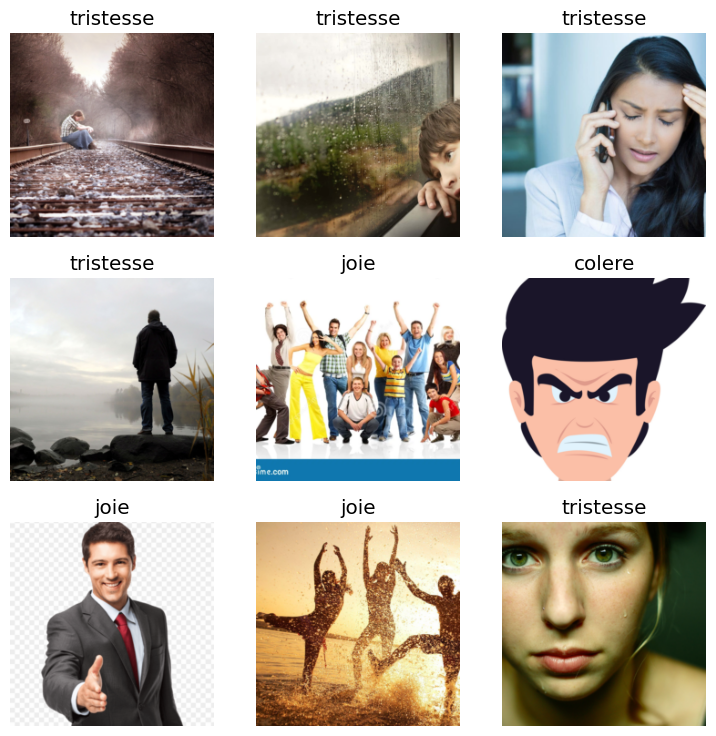

In [16]:
# code pour visualiser un lot


dls.show_batch()



# III. **Nettoyage/Correction des données par inspection visuelle**

## 1. Créer un objet learn avec le modèle resnet18 et le dataloader `dls`

In [17]:
#Création d'un objet learn avec le modèle resnet18 et le dataloader dls
learn =  vision_learner(dls, resnet18, metrics=error_rate, pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 97.2MB/s]


## 2. Exécuter le code ci-dessous et vous aurez un rendu semblable à cette image.

<image src="image_cleaner.png" width="400">


Veuillez pour chaque image, sélectionner:
- `<keep>` si le label est correct
- `<delete>` si l'image est incorrecte ou défectueuse comme un cartoon
- une autre valeur si le label courant est incorrect pour affecter cette autre valeur comme nouveau label à l'image


In [18]:
from fastai.vision.widgets import ImageClassifierCleaner
#Veuillez pour chaque image, sélectionner:

#    <keep> si le label est correct
#   <delete> si l'image est incorrecte ou défectueuse comme un cartoon
#  une autre valeur si le label courant est incorrect pour affecter cette autre valeur comme nouveau label à l'image


train_cleaner = ImageClassifierCleaner(learn, max_n=50)
train_cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Appliquation de la fonction `delete_images` à `train_cleaner` pour supprimer les images défectueuses.

In [19]:
import os
def delete_images(cleaner):
  """Supprime les images sélectionnées
  pour être supprimées par `cleaner`.

  Args:
      cleaner (ImageClassifierCleaner): objet cleaner contenant
      les données
  """
  for i in cleaner.delete():
    im = cleaner.fns[i]
    print(f"Suppression de {im}...")
    os.remove(im)

In [20]:
# Appliquation de la fonction delete_images à train_cleaner
delete_images(train_cleaner)

# IV. **Nettoyage/Correction des données `extra` par inspection visuelle**

Création d'un dataloader à partir du dossier `extra`, puis correction les données par inspection visuelle en suivant la section précédente.

In [21]:
dls_extra = get_dataloader(root_extra)
learn_extra =  vision_learner(dls_extra, resnet18, metrics=error_rate, pretrained=True)
extra_cleaner = ImageClassifierCleaner(learn_extra, max_n=50)
extra_cleaner


(Path('/content/drive/MyDrive/deep_learning/data/extra/colere/image_0.jpg'), 'colere')


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
delete_images(extra_cleaner)